In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [106]:
df = pd.read_csv('insurance.csv')  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [107]:
print(df.shape)
print(df.isnull().sum())

(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [108]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

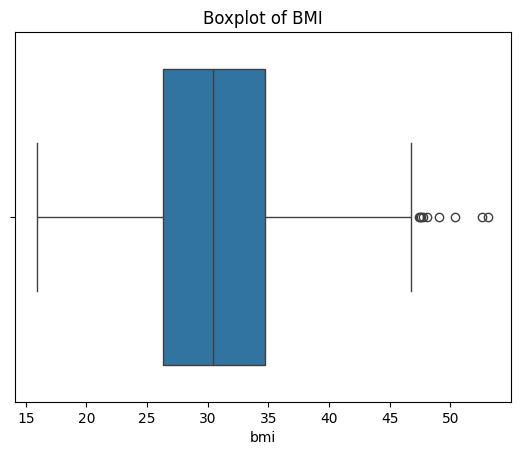

In [109]:
sns.boxplot(x=df['bmi'], )
plt.title("Boxplot of BMI")
plt.show()

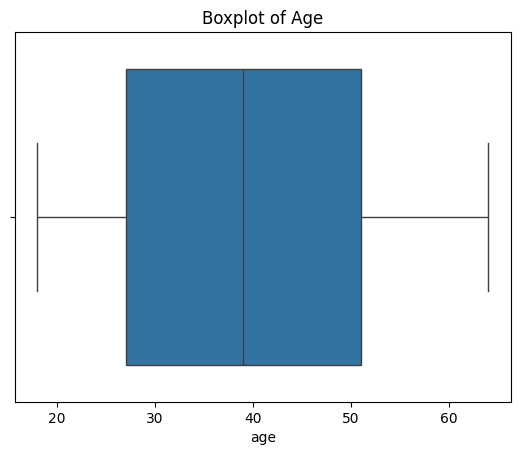

In [110]:
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

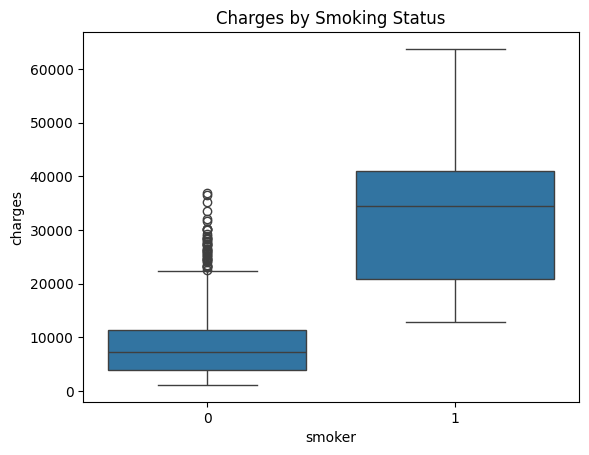

In [111]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoking Status")
plt.show()

In [116]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, 'bmi')
df = remove_outliers_iqr(df, 'charges')
print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (1105, 9)


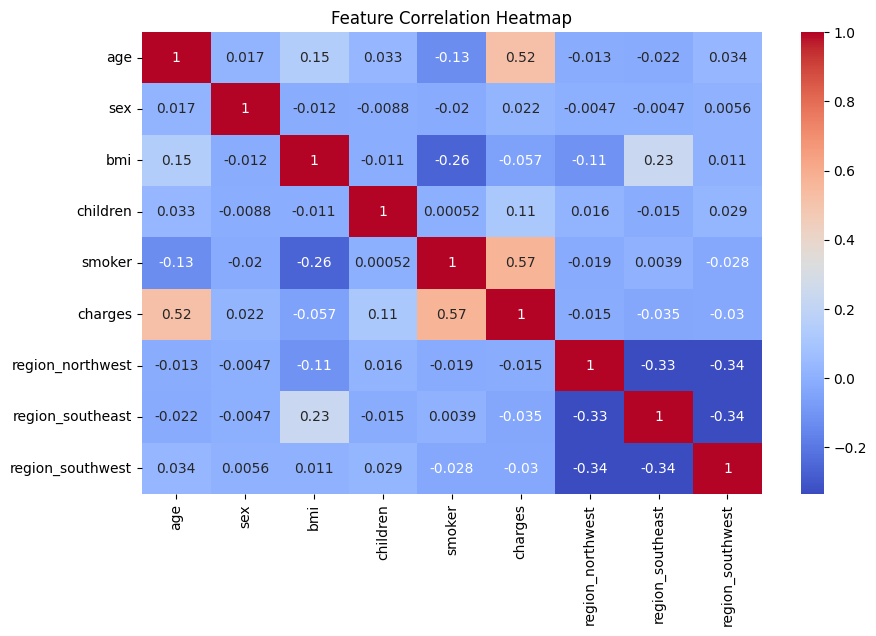

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

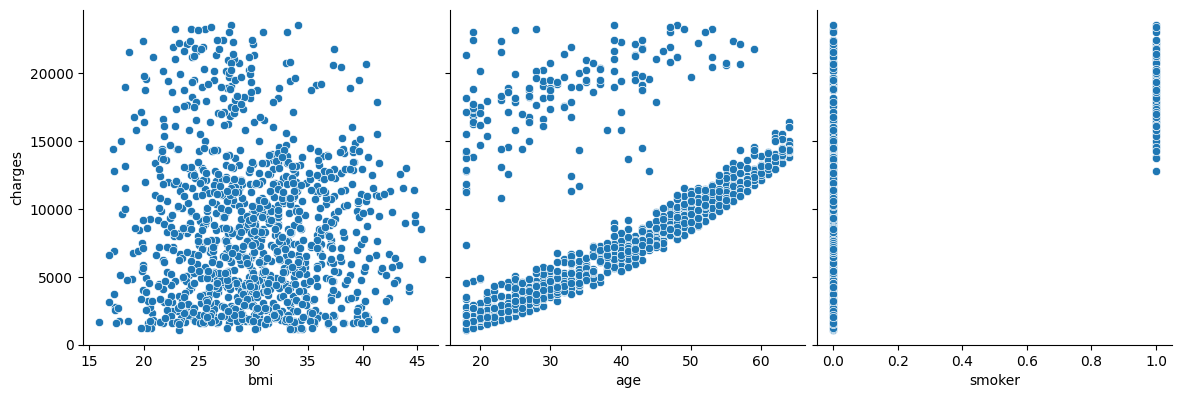

In [118]:
sns.pairplot(df, x_vars=['bmi', 'age', 'smoker'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

In [119]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
  
print("Linear Regression")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression
MAPE: 23.14%
MAE: 1480.7607546735542
RMSE: 2899.571674708743
